In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

In [4]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

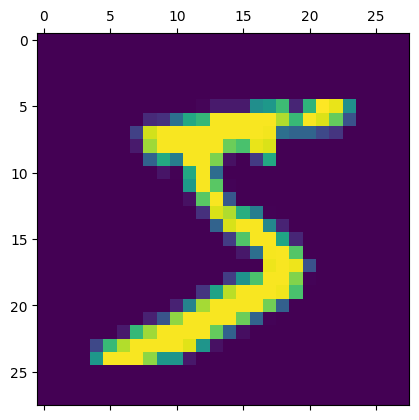

In [7]:
import matplotlib.pyplot as plt

plt.matshow(xtrain[0])

In [8]:
ytrain[0]

5

In [10]:
print(xtrain[0].shape)

(28, 28)


In [14]:
xtrain = xtrain/255
xtest = xtest/255

In [15]:
xtrain_flat = xtrain.reshape(len(xtrain), 28*28)
xtest_flat = xtest.reshape(len(xtest), 28*28)

In [16]:
print(xtrain_flat.shape)
print(xtest_flat.shape)

(60000, 784)
(10000, 784)


In [18]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(xtrain_flat, ytrain, epochs=10)

Epoch 1/10


2024-10-01 22:52:12.921823: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.4677 - accuracy: 0.8781
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3040 - accuracy: 0.9144
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.9202
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2729 - accuracy: 0.9242
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2622 - accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2585 - accuracy: 0.9271
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2554 - accuracy: 0.9295
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2532 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2511 - accurac

In [20]:
print(model.evaluate(xtest_flat, ytest))

2024-10-01 23:20:44.777530: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 3s 9ms/step - loss: 0.2622 - accuracy: 0.9271
[0.26215484738349915, 0.9271000027656555]


In [21]:
ypred = model.predict(xtest_flat)
ypred

  1/313 [..............................] - ETA: 29s

2024-10-01 23:47:04.875014: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step


array([[3.7254803e-03, 1.6778081e-08, 1.5893104e-02, ..., 9.9985051e-01,
        9.8513670e-02, 6.6079277e-01],
       [3.0052283e-01, 3.2120019e-03, 9.9974859e-01, ..., 3.3023849e-15,
        7.0814721e-02, 4.8939186e-12],
       [1.5515936e-04, 9.9417132e-01, 7.2291595e-01, ..., 5.1520407e-02,
        3.3885697e-01, 3.8628373e-02],
       ...,
       [1.1580402e-06, 7.1925717e-07, 8.6902583e-04, ..., 2.1023662e-01,
        6.4565384e-01, 7.9908109e-01],
       [2.4102819e-05, 5.0295494e-05, 5.1569034e-05, ..., 1.6753249e-05,
        6.4663124e-01, 2.6758615e-05],
       [8.9024659e-04, 1.1284037e-11, 3.6335629e-01, ..., 9.4654506e-11,
        2.6494057e-05, 2.5448319e-08]], dtype=float32)

In [28]:
ypred_labels = [np.argmax(i) for i in ypred]
ypred_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 5,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [29]:
cm = tf.math.confusion_matrix(labels=ytest, predictions=ypred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1113,    4,    2,    0,    1,    4,    2,    9,    0],
       [   4,    7,  932,   14,    8,    3,   12,    9,   40,    3],
       [   3,    0,   19,  923,    1,   23,    2,    9,   24,    6],
       [   1,    1,    6,    2,  922,    0,    9,    4,   10,   27],
       [   8,    2,    4,   37,   11,  772,   13,    9,   31,    5],
       [  11,    3,    6,    1,    7,   11,  916,    1,    2,    0],
       [   1,    6,   24,    6,    7,    1,    0,  948,    2,   33],
       [   7,    9,    6,   21,    9,   23,    9,   11,  872,    7],
       [  11,    7,    1,    8,   41,    7,    0,   17,    6,  911]],
      dtype=int32)>

<Axes: >

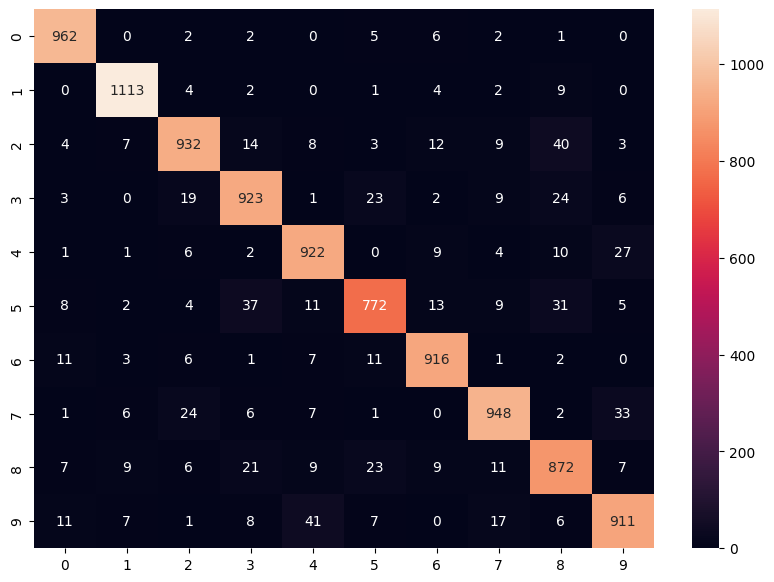

In [32]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')